In [2]:
! pip install simpletransformers

     |████████████████████████████████| 221 kB 5.3 MB/s 
     |████████████████████████████████| 124 kB 53.4 MB/s 
     |████████████████████████████████| 1.2 MB 43.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 3.3 MB 28.3 MB/s 
     |████████████████████████████████| 1.6 MB 37.8 MB/s 
     |████████████████████████████████| 8.0 MB 50.7 MB/s 
     |████████████████████████████████| 264 kB 53.8 MB/s 
     |████████████████████████████████| 2.6 MB 43.1 MB/s 
     |████████████████████████████████| 895 kB 51.3 MB/s 
     |████████████████████████████████| 636 kB 18.2 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 133 kB 54.3 MB/s 
     |████████████████████████████████| 170 kB 56.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 118 kB 56.7 MB/s 
     |████████████████████████████████| 243 kB 52.4 MB/s 
     |███████████████

In [4]:
import pandas as pd 

In [6]:
url = 'https://raw.githubusercontent.com/Jhagrut/Twitter-Project/main/Data/dft%20updated.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [7]:
df.head()

,injury_report,tweet,kfold
0,0,hard https feeling nizbtc7jet,0
1,0,https x5cvdrbye staff number pitching put,0
2,0,well go tatis oxrycgvpom denver https join siz...,0
3,0,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,0,single time jakecrousemlb read,0


In [8]:
print(set(df['injury_report'].values))

{0, 1}


In [9]:
df.injury_report = pd.Categorical(df.injury_report)
df['injury_report'] = df['injury_report'].cat.codes
df = df.dropna()

In [10]:
df_new = df[["tweet", "injury_report"]]

In [11]:
df_new1 = df_new[df_new['injury_report']==0]
df_new2 = df_new[df_new['injury_report']==1]

In [12]:
df_new1

,tweet,injury_report
0,hard https feeling nizbtc7jet,0
1,https x5cvdrbye staff number pitching put,0
2,well go tatis oxrycgvpom denver https join siz...,0
3,pl6mzciiam 415 come soon https oracleparksf tk...,0
4,single time jakecrousemlb read,0
...,...,...
14922,line kind craig game counsell libka brewer cle...,0
14923,increase completely sweat initially usage earl...,0
14924,bring d8zyjpt6q0 jlldt2hqua tothemoon https st...,0
14925,2lt3lkdopw go week https mlb amp throw play,0


In [13]:
df_new2['tweet'].sample(10).tolist()

['sox assignment recall https chris sale tanner houck red begin rehab 22ducx7vzh co4uov0k7x',
 'cole aaron questionable get say start weather boone ivs tonight point seattle gerrit',
 'gray sonny upcoming roster return weekend busy eligible sunday list injure move',
 'covid start week relate nola list remain',
 'woodward home hot base need maybe lot trot lately time gallo fine chris day unusual cite team run conspiratorial say week non rest think streak',
 'kart tanner red jarren night mushroom bloom duran rwadj01yhp send rehab today mario sox second chaim face https chris half begin assignment sale houck',
 'inflammation head sean yenssy active elbow foley right reid',
 'broadcast hot good wish related gary need forward accident cohen look follow ballpark gardening stitch toe big tub later see week sny keith hernandez',
 'inning toussaint triple 132 whip start walk past opp era strikeout gwinnett touki rehab',
 'today sox tell well say cora alex feel late eduardo rodriguez report']

In [14]:
df_new1 = df_new1.sample(6000, replace = True)

In [15]:
df_new = pd.concat([df_new1,df_new2])

In [16]:
df_new.reset_index(drop = True, inplace = True)

In [17]:
df_new

,tweet,injury_report
0,find incredible lfpajajgoi page houstondynamo ...,0
1,105 solo lead exit foot line crush astro 402 g...,0
2,martinez teammate join 2011 draft bradley star...,0
3,game start doubleheader tonight tomorrow postp...,0
4,exit lucky l7kaqwqpxp game velocity https pitc...,0
...,...,...
7062,covid possibly depend testing player rapid tes...,1
7063,eickhoff waiver assignment surgery undergo roo...,1
7064,long close martinez go strasburg assignment pi...,1
7065,reinforcement long optioned arrive erick nat k...,1


In [18]:
from google.colab import files
df_new.to_csv("dft_sampled_1.csv")
files.download('dft_sampled_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new['tweet'], df_new['injury_report'], random_state = 91, stratify = df_new['injury_report'], test_size = 0.2)

In [20]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, random_state=91)

In [22]:
from simpletransformers.classification import ClassificationModel

In [23]:
df_new

,tweet,injury_report
0,find incredible lfpajajgoi page houstondynamo ...,0
1,105 solo lead exit foot line crush astro 402 g...,0
2,martinez teammate join 2011 draft bradley star...,0
3,game start doubleheader tonight tomorrow postp...,0
4,exit lucky l7kaqwqpxp game velocity https pitc...,0
...,...,...
7062,covid possibly depend testing player rapid tes...,1
7063,eickhoff waiver assignment surgery undergo roo...,1
7064,long close martinez go strasburg assignment pi...,1
7065,reinforcement long optioned arrive erick nat k...,1


In [24]:
train

,tweet,injury_report
1700,sox couple grandal lineup game series yasmani ...,0
367,pxgeiorjrb https,0
6272,arrieta https tight place cub fygxyyotgc hamst...,1
4030,whooole prior dickerson suddenly carry arenado...,0
5401,qq3fsetwir cent https lockdown5,0
...,...,...
1885,arrieta jake question lot passionately https l...,0
210,kdrixusdss https gavin debut sheet,0
3946,fourth start brandon lead woodruff red margin ...,0
1710,mvp https nczoq7siuw midseason season time hal...,0


In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install Counter

  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=f5f463e15b1287b01228707cf8a34c95348876de9734971d91ee875d10b2b939
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built Counter


In [25]:
import collections

In [ ]:
import imblearn  
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
train["injury_report"]

1700    0
367     0
6272    1
4030    0
5401    0
       ..
1885    0
210     0
3946    0
1710    0
6322    1
Name: injury_report, Length: 5300, dtype: int8

In [26]:
counter = collections.Counter(train["injury_report"])
print(counter)

Counter({0: 4480, 1: 820})


In [ ]:
smt = SMOTE()

ValueError: ignored

In [52]:
# set use_cuda=False on CPU-only platforms
from simpletransformers.classification import ClassificationModel, ClassificationArgs


model_args = ClassificationArgs()
model_args.use_early_stopping = True
model_args.early_stopping_delta = 0.01
model_args.early_stopping_metric = "mcc"
model_args.early_stopping_metric_minimize = False
model_args.early_stopping_patience = 5
model_args.evaluate_during_training_steps = 1000

bert = ClassificationModel('roberta', 'roberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 5,
    'use_early_stopping': True,
    'early_stopping_delta': 0.01,
    'early_stopping_metric': "mcc",
    'early_stopping_metric_minimize': False,
    'early_stopping_patience': 5,
    'evaluate_during_training_steps': 1000
})
bert.train_model(train)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.

  0%|          | 0/5300 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/663 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm


Running Epoch 1 of 5:   0%|          | 0/663 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/663 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/663 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/663 [00:00<?, ?it/s]

(3315, 0.16748964194978164)

In [53]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#others
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.special import softmax

In [54]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=sklearn.metrics.accuracy_score)
print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1767 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/221 [00:00<?, ?it/s]

{'mcc': 0.8862773448358642, 'tp': 234, 'tn': 1482, 'fp': 38, 'fn': 13, 'auroc': 0.9837550607287449, 'auprc': 0.9187580646484139, 'acc': 0.9711375212224108, 'eval_loss': 0.12880408139720273}


In [55]:
result, model_outputs, wrong_predictions = bert.eval_model(test, acc=confusion_matrix)
result

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1767 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/221 [00:00<?, ?it/s]

{'acc': array([[1482,   38],
        [  13,  234]]),
 'auprc': 0.9187580646484139,
 'auroc': 0.9837550607287449,
 'eval_loss': 0.12880408139720273,
 'fn': 13,
 'fp': 38,
 'mcc': 0.8862773448358642,
 'tn': 1482,
 'tp': 234}

In [56]:
import torch
torch.save(bert, '/roberta1')

In [57]:
cm = result["acc"]

recall = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
precision = np.mean(np.diag(cm) / np.sum(cm, axis = 0))

print(precision, recall)

0.9257992327365729 0.9611842105263158


In [39]:
# bert.get_named_parameters()

In [58]:
result

{'acc': array([[1482,   38],
        [  13,  234]]),
 'auprc': 0.9187580646484139,
 'auroc': 0.9837550607287449,
 'eval_loss': 0.12880408139720273,
 'fn': 13,
 'fp': 38,
 'mcc': 0.8862773448358642,
 'tn': 1482,
 'tp': 234}

In [59]:
model_outputs

array([[ 3.62304688, -3.8828125 ],
       [ 3.60742188, -3.87890625],
       [ 3.60351562, -3.86914062],
       ...,
       [ 3.6171875 , -3.875     ],
       [ 3.60351562, -3.90234375],
       [ 3.61328125, -3.85742188]])

In [60]:
wrong_predictions

[]

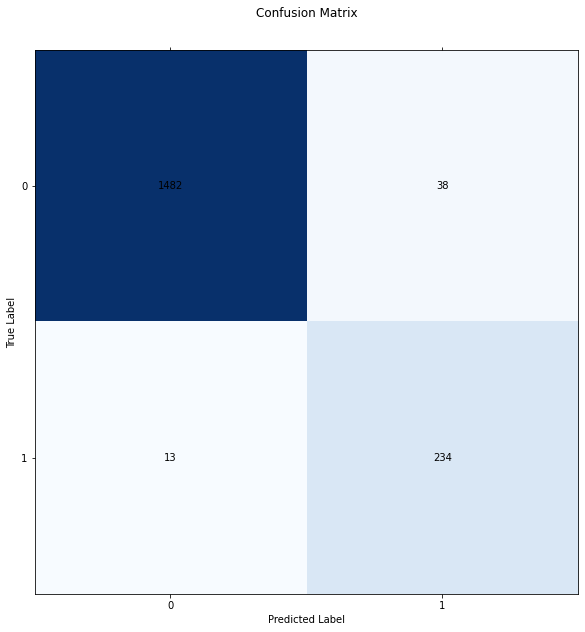

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

intersection_matrix = cm

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in range(2):
    for j in range(2):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

plt.xticks(range(0, 2))
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(np.arange(0, 2, step=1))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [62]:
len(model_outputs)

1767

In [63]:
len(test)

1767

In [64]:
tst = test['tweet'].tolist()

In [65]:
y = test['injury_report'].tolist()

In [66]:
fn = []
fp = []
ind = []
for i in range(len(model_outputs)):
  x = model_outputs[i];
  if x[1]>x[0] and y[i]==0:
    fp.append(tst[i])
  elif x[0]>x[1] and y[i]==1:
    fn.append(tst[i])
print(fp)
print(len(fp))
print(fn)
print(len(fn))

['check yandy well mph snag 105 diving ray fifth end indian diaz zimmer rope bradley finger bat', 'bleacher get christma player bunny watch picture tournament stair bakos floor bob ear mary kid team wendelin run cramp win rest gym thechrismack lap mount', 'lamondeshawn13 amid game maddyreb stretch careful schedule consecutive day avoid fatigue unforgiving injury', 'holt play falefa get kiner hitter leadoff day brock breather dahl gallo today', 'lineup gome ray parra schwarber lester soto castro turner mercer bell today', 'moistness moment sky bronx fall', 'domingo go find german bullpen guess warm yankee', 'sox arroyo say cora join tomorrow christian anaheim red', 'wandy loaisiga corte peralta vaccinate confirm fully nestor jonathan yankee', 'minor mike include star mckay setback message honor mariner injury brendan plus margot weird zunino https update congratulatory thompson pile note ray think n72qefqsmt fleming', 'lie triple garrett start man short issue tonight mpicardi pitch appa

In [67]:
fn

['game mound https squadup 1uq2n3wdij jamo',
 'triple royal omaha start rollercoaster jakob build day shift place juni sort relief',
 'fastball kluber mound say hasn start return think want day potential yankee date time today throw corey',
 'come morgan tonight pitch cub chafin game option leave kimbrel william fresh thompson inning arrieta week miss winkler brother wieck probably',
 'bauer mlb mlbpa source consent effective leave tomorrow day extend administrative trevor',
 'live kevin go ray say port anderson nick charlotte feel good cash today',
 'go edward head game margot ray doubleheader plan xavier indian future https 7qssv5wj6h brujan',
 'myer tatis lhp rivas kyle hosmer machado rockie cronenworth grisham freeland knehr opener pham',
 'pirate triblive return https steven join homestand ready 2gxmirqjmt team brault',
 'start tonight good innings middle need trea hope like bug amp blowout doesn game take dude leave day tough finger pretty pride season turner play',
 'nwnshahy9 h

In [68]:
fp

['check yandy well mph snag 105 diving ray fifth end indian diaz zimmer rope bradley finger bat',
 'bleacher get christma player bunny watch picture tournament stair bakos floor bob ear mary kid team wendelin run cramp win rest gym thechrismack lap mount',
 'lamondeshawn13 amid game maddyreb stretch careful schedule consecutive day avoid fatigue unforgiving injury',
 'holt play falefa get kiner hitter leadoff day brock breather dahl gallo today',
 'lineup gome ray parra schwarber lester soto castro turner mercer bell today',
 'moistness moment sky bronx fall',
 'domingo go find german bullpen guess warm yankee',
 'sox arroyo say cora join tomorrow christian anaheim red',
 'wandy loaisiga corte peralta vaccinate confirm fully nestor jonathan yankee',
 'minor mike include star mckay setback message honor mariner injury brendan plus margot weird zunino https update congratulatory thompson pile note ray think n72qefqsmt fleming',
 'lie triple garrett start man short issue tonight mpicardi 

In [ ]:
len(model_outputs)

In [ ]:
len(wrong_predictions[0])

In [ ]:
lst

In [51]:
225/247

0.9109311740890689